In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# TO DO :-

1. Add WHAT IMPORTANT INFORMATION we INFERED form those long EDA plots ( plots of all 24 columns ) 

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

In [2]:
data = pd.read_csv('./submission/train.csv')
initial_m, initial_n = data.shape
data.head()  # (59611, 24)

,response_id,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,promotions_count,...,dependents_count,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,exit_status
0,8410,31,Male,19,Education,5390.0,Excellent,Medium,Average,2,...,0.0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534.0,Poor,High,Low,3,...,3.0,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159.0,Good,High,Low,0,...,3.0,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989.0,Good,High,High,1,...,2.0,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821.0,NaN,NaN,Average,0,...,0.0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59611 entries, 0 to 59610
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   response_id               59611 non-null  int64   
 1   age                       59611 non-null  int64   
 2   gender                    59611 non-null  object  
 3   years_at_company          59611 non-null  int64   
 4   job_role                  59611 non-null  object  
 5   monthly_income            57811 non-null  float64 
 6   work_life_balance         49467 non-null  object  
 7   job_satisfaction          52447 non-null  object  
 8   performance_rating        59611 non-null  object  
 9   promotions_count          59611 non-null  int64   
 10  overtime                  59611 non-null  object  
 11  distance_from_home        59611 non-null  int64   
 12  education_level           59611 non-null  object  
 13  marital_status            59611 non-null  obje

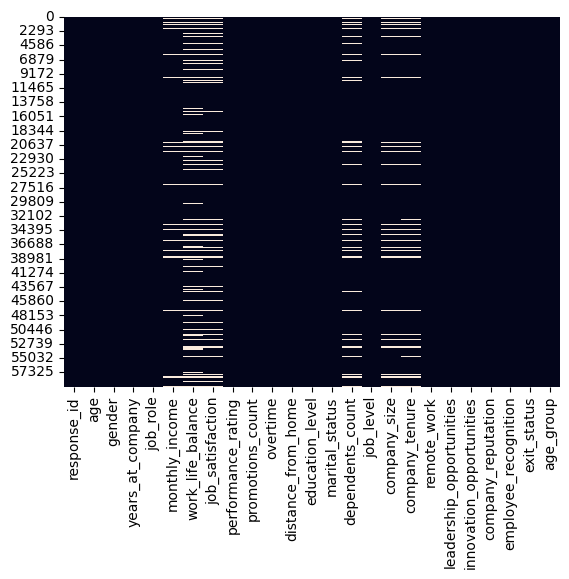

In [22]:
def explore_dataset(dataset):
    print(dataset.info())
    sns.heatmap(dataset.isnull(),cbar = False)

explore_dataset(data)

In [11]:
data.isnull().sum()

response_id                     0
age                             0
gender                          0
years_at_company                0
job_role                        0
monthly_income               1800
work_life_balance           10144
job_satisfaction             7164
performance_rating              0
promotions_count                0
overtime                        0
distance_from_home              0
education_level                 0
marital_status                  0
dependents_count             4780
job_level                       0
company_size                 2992
company_tenure               4184
remote_work                     0
leadership_opportunities        0
innovation_opportunities        0
company_reputation              0
employee_recognition            0
exit_status                     0
dtype: int64

In [ ]:
def display_basic_info(data):
    print("\nDataset Shape:", data.shape)
    print("\nDataset Info:")
    print("\nMissing Values:")
    print(data.isnull().sum())
    print("\nDuplicate Rows:", data.duplicated().sum())
display_basic_info(data)

# (59611, 24) <== Shape of X


Dataset Shape: (59611, 24)

Dataset Info:

Missing Values:
response_id                     0
age                             0
gender                          0
years_at_company                0
job_role                        0
monthly_income               1800
work_life_balance           10144
job_satisfaction             7164
performance_rating              0
promotions_count                0
overtime                        0
distance_from_home              0
education_level                 0
marital_status                  0
dependents_count             4780
job_level                       0
company_size                 2992
company_tenure               4184
remote_work                     0
leadership_opportunities        0
innovation_opportunities        0
company_reputation              0
employee_recognition            0
exit_status                     0
dtype: int64

Duplicate Rows: 13


In [7]:
# 2. Statistical Summary
def display_statistical_summary(data):
    print("\n2. STATISTICAL SUMMARY")
    print("\nNumerical Columns Summary:")
    print(data.describe())
    print("\nCategorical Columns Summary:")
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"\n{col} value counts:")
        print(data[col].value_counts(normalize=True).round(3) * 100, "%")

display_statistical_summary(data)


2. STATISTICAL SUMMARY

Numerical Columns Summary:
        response_id           age  years_at_company  monthly_income  \
count  59611.000000  59611.000000      59611.000000    57811.000000   
mean   37224.692171     38.562497         15.752630     7311.070350   
std    21519.598309     12.082500         11.245724     2197.444033   
min        1.000000      6.000000          1.000000     1316.000000   
25%    18576.000000     28.000000          7.000000     5661.000000   
50%    37207.000000     39.000000         13.000000     7358.000000   
75%    55874.500000     49.000000         23.000000     8882.000000   
max    74498.000000     59.000000         51.000000    56050.000000   

       promotions_count  distance_from_home  dependents_count  company_tenure  
count      59611.000000        59611.000000      54831.000000    55427.000000  
mean           0.832514           50.024912          1.648465       55.772909  
std            0.994987           28.519542          1.555767       

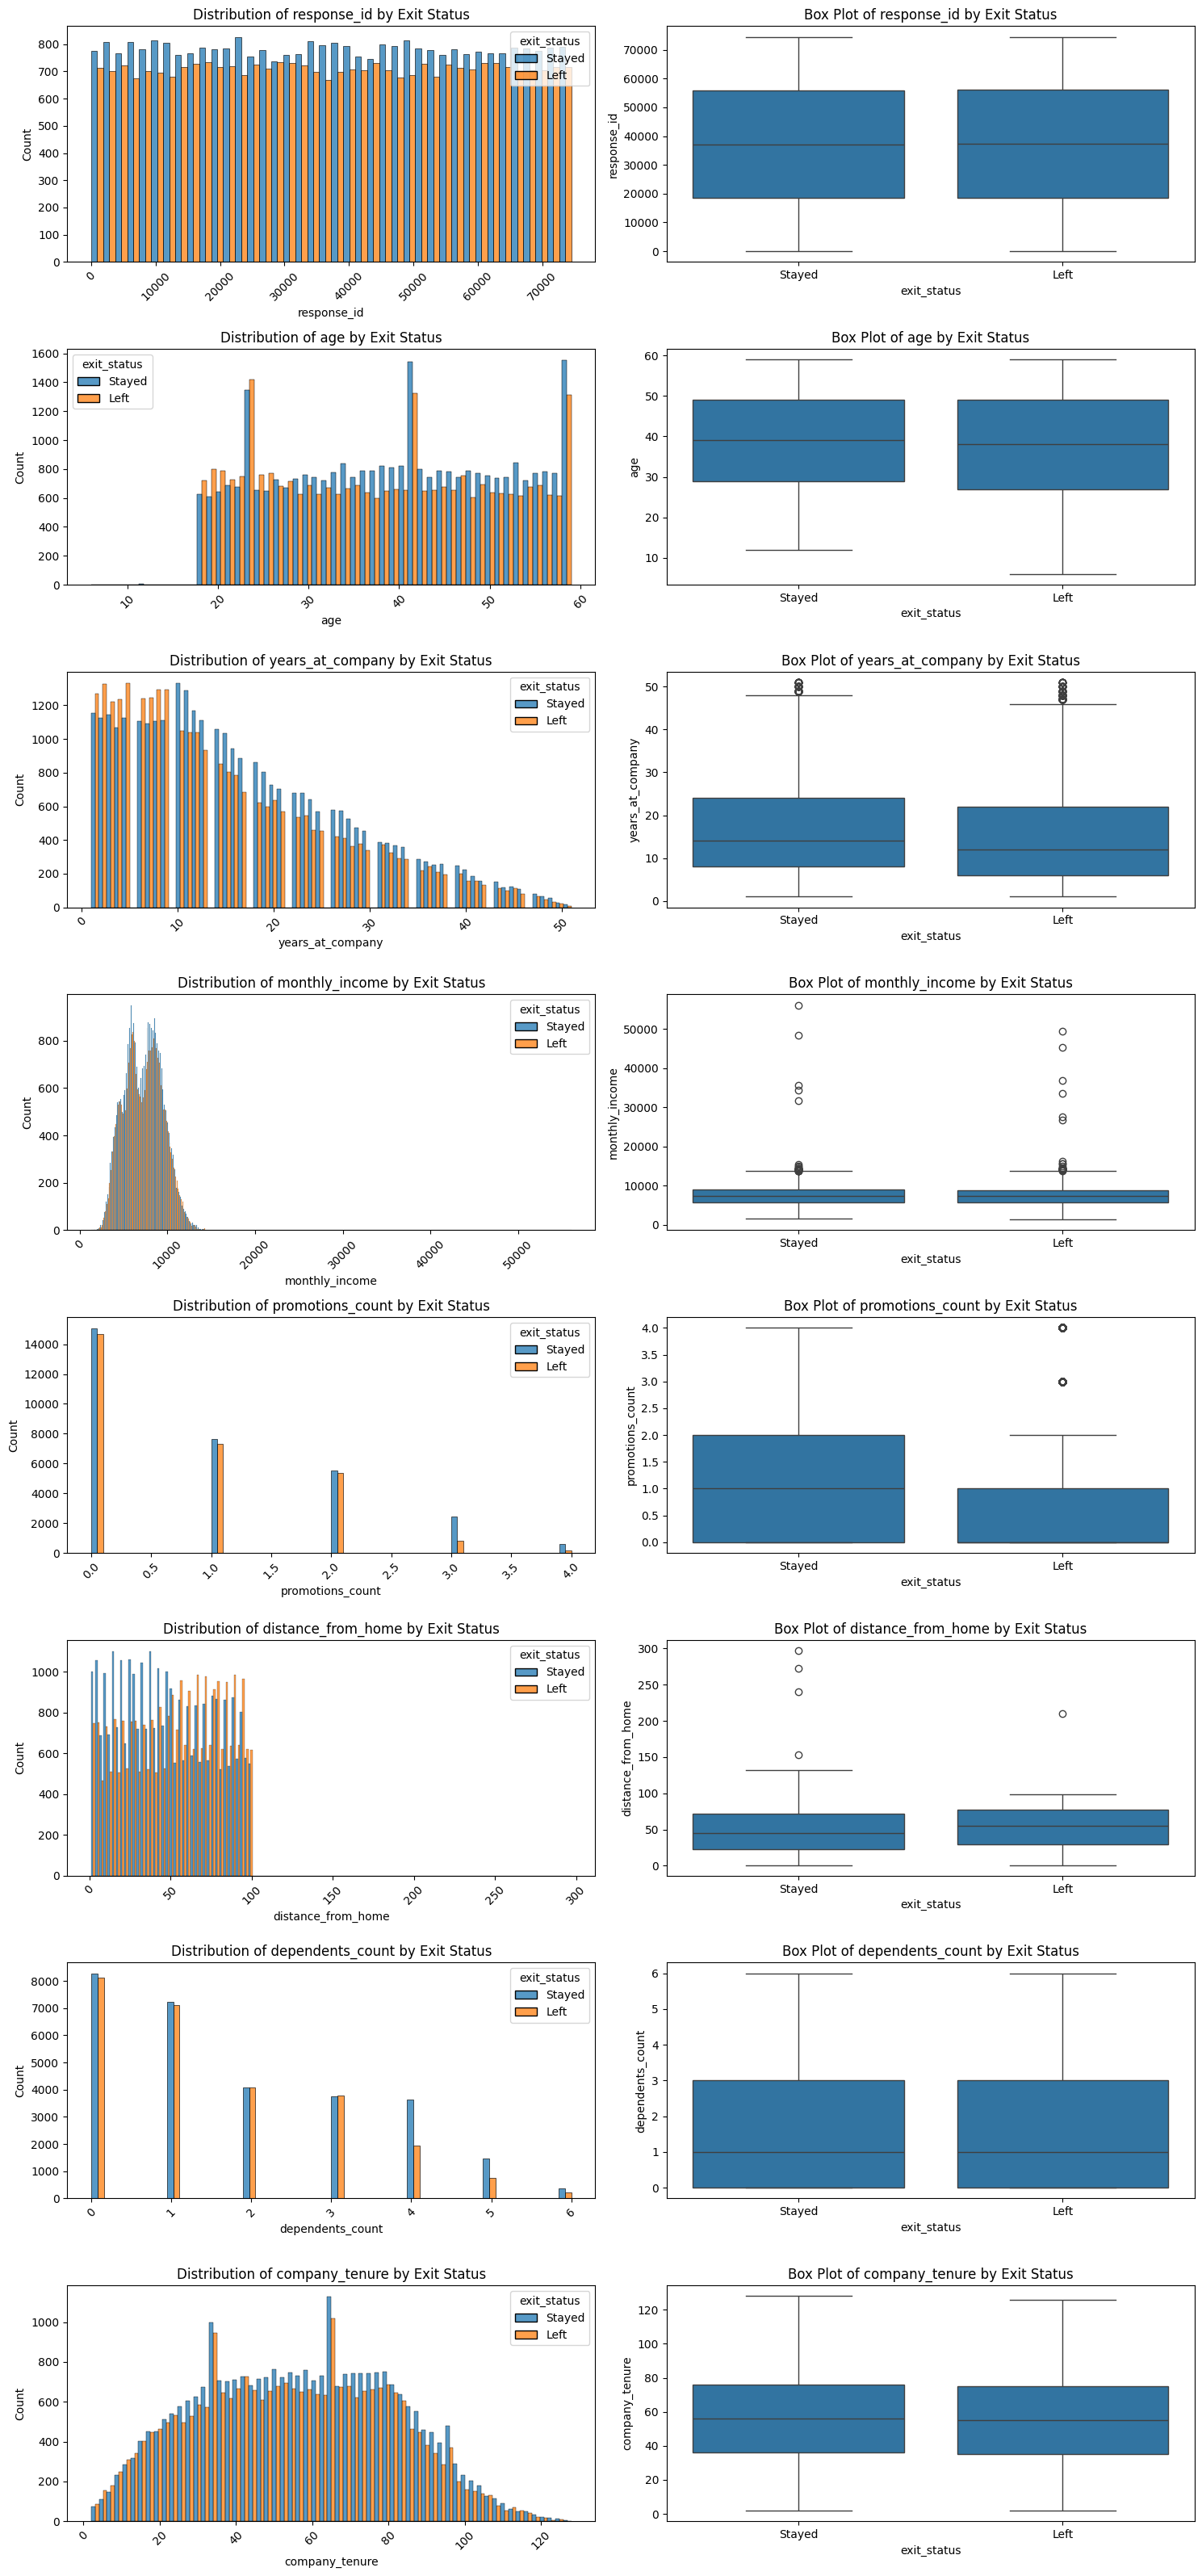

In [ ]:
# 3. Distribution of each feature ( Plotting Histogram and Boxplot for ALL the columns )
def plot_distributions(data):
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
    plt.figure(figsize=(15, len(numerical_cols)*4))
    
    for idx, col in enumerate(numerical_cols, 1):

        # Histogram
        plt.subplot(len(numerical_cols), 2, idx*2-1)
        sns.histplot(data=data, x=col, hue='exit_status', multiple="dodge")
        plt.title(f'Distribution of {col} by Exit Status')
        plt.xticks(rotation=45)
        
        # Box Plot
        plt.subplot(len(numerical_cols), 2, idx*2)
        sns.boxplot(data=data, y=col, x='exit_status')
        plt.title(f'Box Plot of {col} by Exit Status')
    
    plt.tight_layout()
    plt.show()

plot_distributions(data)

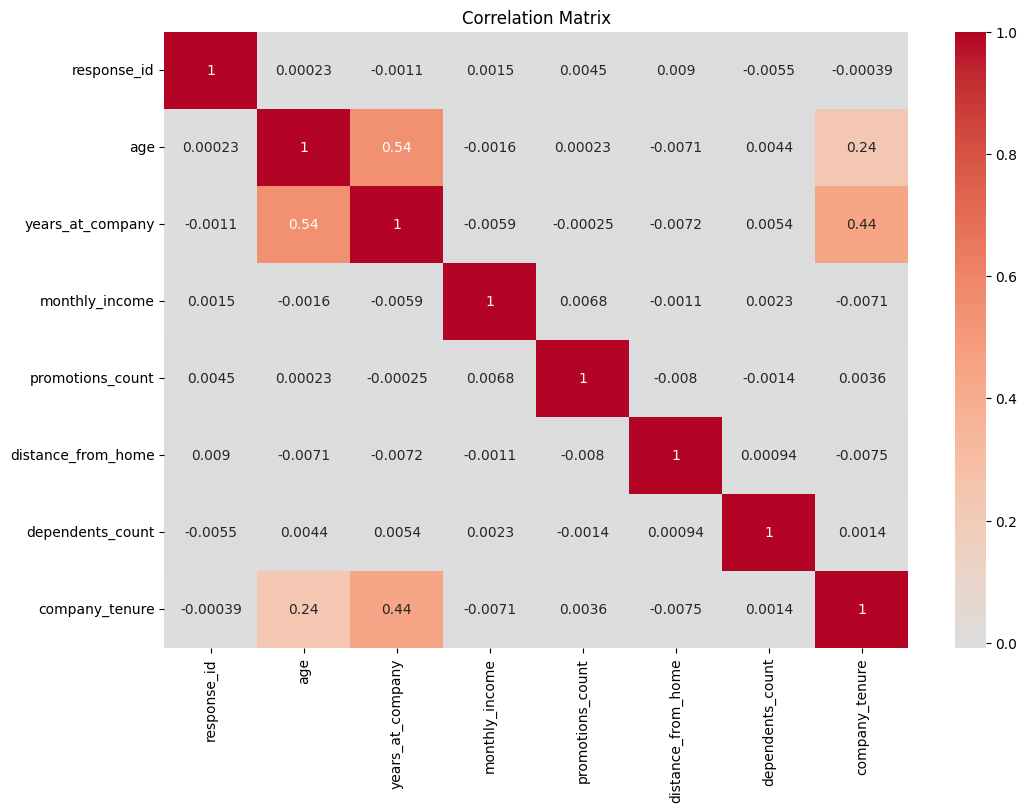

In [6]:
# 4. Correlation Analysis
def plot_correlation_matrix(data):
    numerical_data = data.select_dtypes(include=['int64', 'float64'])
    plt.figure(figsize=(12, 8))
    sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


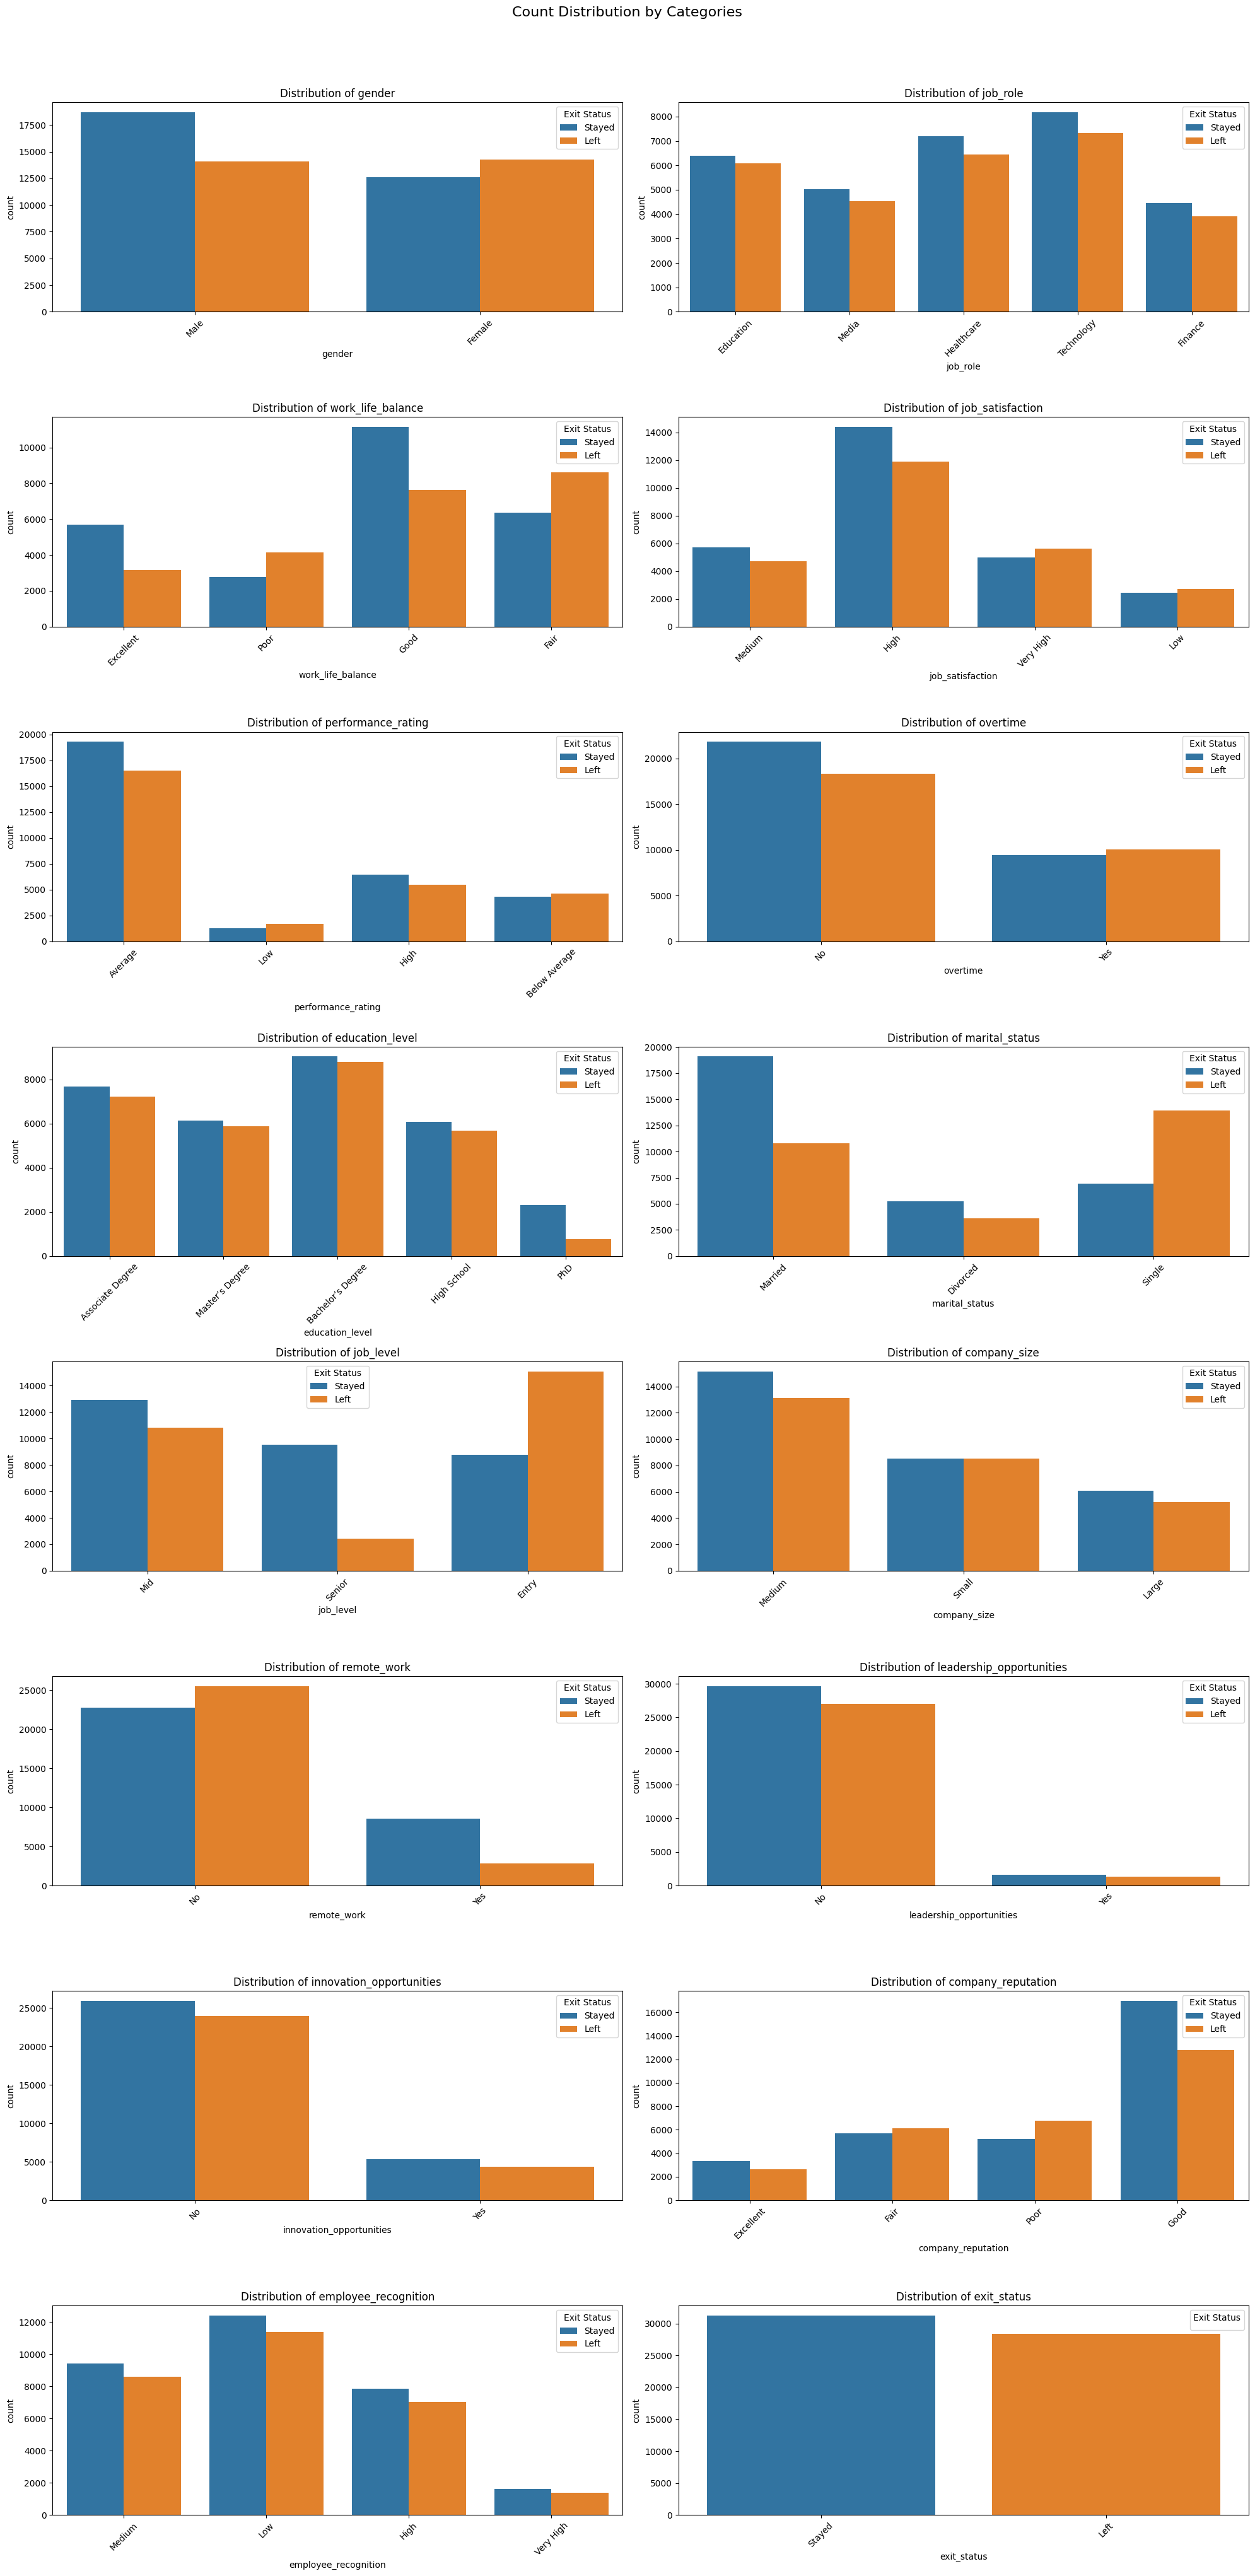

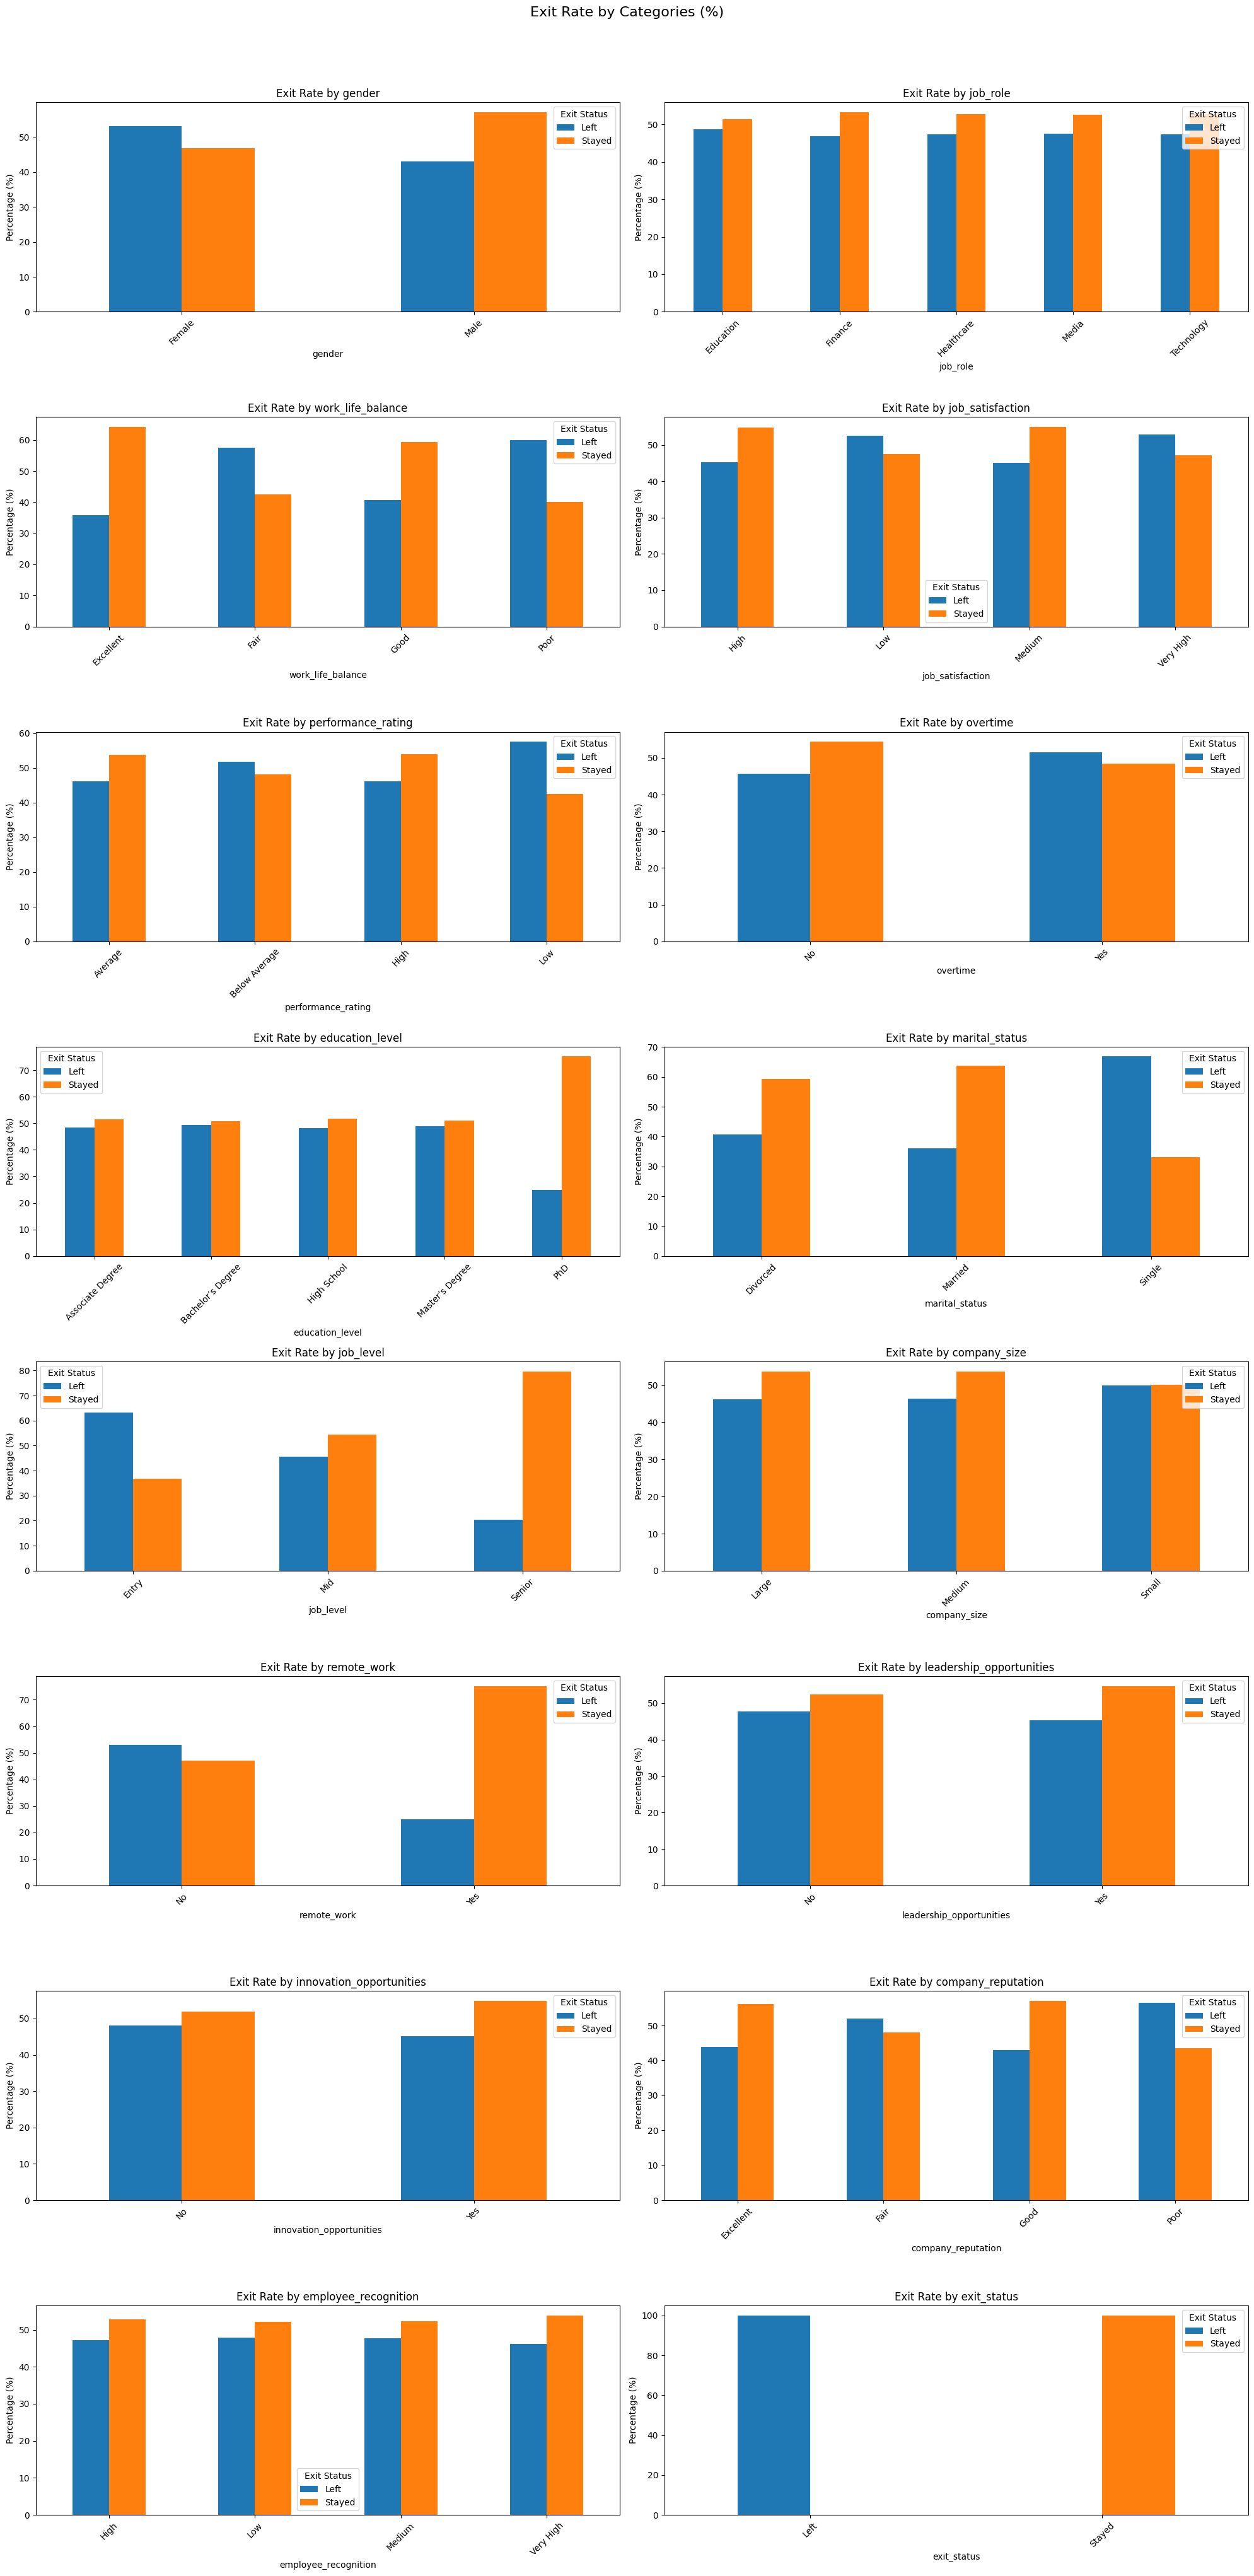

In [ ]:
# 5. Categorical Analysis
'''
THis function creates:

- First figure    : Shows the raw count distribution for each category
- Second figure   : Shows the exit rate percentages for each category
'''


def plot_categorical_analysis(data):
    # Get categorical columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    n_cols = len(categorical_cols)
    
    # Calculate number of rows and columns for subplots
    n_rows = (n_cols + 1) // 2  # Round up division
    
    # Create two separate figures for count plots and percentage plots
    # Figure 1: Count Plots
    fig1, axes1 = plt.subplots(n_rows, 2, figsize=(20, 5*n_rows))
    fig1.suptitle('Count Distribution by Categories', fontsize=16, y=1.02)
    
    # Figure 2: Percentage Plots
    fig2, axes2 = plt.subplots(n_rows, 2, figsize=(20, 5*n_rows))
    fig2.suptitle('Exit Rate by Categories (%)', fontsize=16, y=1.02)
    
    # Flatten axes arrays for easier indexing
    axes1 = axes1.flatten() if n_rows > 1 else [axes1]
    axes2 = axes2.flatten() if n_rows > 1 else [axes2]
    
    # Plot each categorical variable
    for idx, col in enumerate(categorical_cols):
        # Count Plot
        sns.countplot(data=data, 
                     x=col, 
                     hue='exit_status',
                     ax=axes1[idx])
        axes1[idx].set_title(f'Distribution of {col}')
        axes1[idx].tick_params(axis='x', rotation=45)
        axes1[idx].legend(title='Exit Status')
        
        # Percentage Plot
        exit_rates = pd.crosstab(data[col], 
                                data['exit_status'], 
                                normalize='index') * 100
        exit_rates.plot(kind='bar', 
                       ax=axes2[idx])
        axes2[idx].set_title(f'Exit Rate by {col}')
        axes2[idx].tick_params(axis='x', rotation=45)
        axes2[idx].set_ylabel('Percentage (%)')
        axes2[idx].legend(title='Exit Status')
    
    # Remove any empty subplots
    for idx in range(len(categorical_cols), len(axes1)):
        fig1.delaxes(axes1[idx])
        fig2.delaxes(axes2[idx])
    
    # Adjust layout
    fig1.tight_layout()
    fig2.tight_layout()
    
    plt.show()

# Example usage:
plot_categorical_analysis(data)

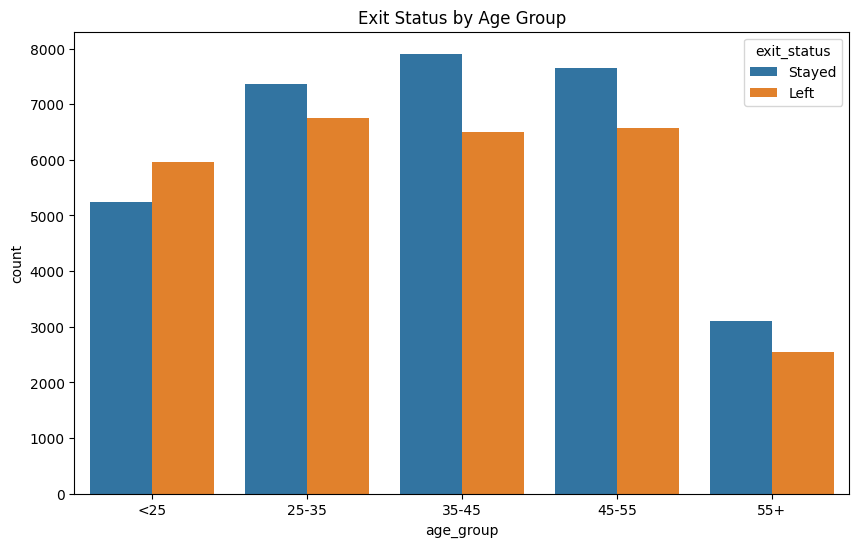

In [12]:
# 6. Age Group Analysis
def analyze_age_groups(data):
    data['age_group'] = pd.cut(data['age'], bins=[0, 25, 35, 45, 55, 100], 
                              labels=['<25', '25-35', '35-45', '45-55', '55+'])
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='age_group', hue='exit_status')
    plt.title('Exit Status by Age Group')
    plt.show()

analyze_age_groups(data)

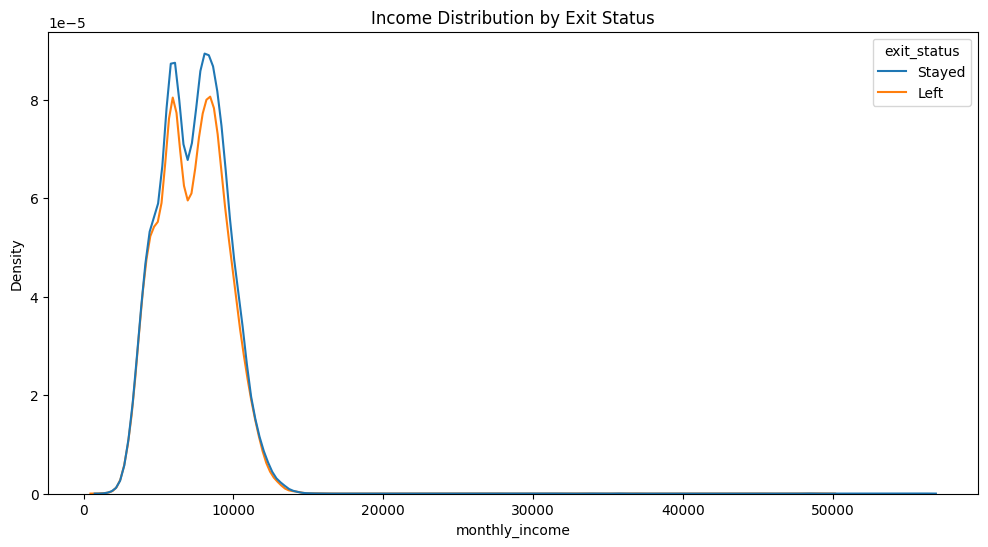

In [13]:
# 7. Income Distribution Analysis
def analyze_income_distribution(data):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=data, x='monthly_income', hue='exit_status')
    plt.title('Income Distribution by Exit Status')
    plt.show()

analyze_income_distribution(data)

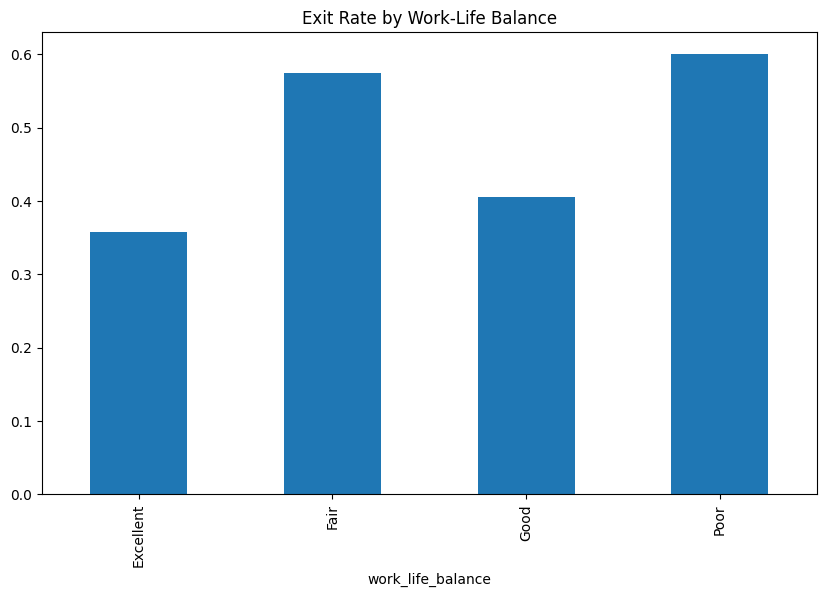

In [15]:
# 8. Work-Life Balance Impact
def analyze_work_life_balance(data):
    plt.figure(figsize=(10, 6))
    exit_rates = pd.crosstab(data['work_life_balance'], data['exit_status'], normalize='index')
    exit_rates['Left'].plot(kind='bar')
    plt.title('Exit Rate by Work-Life Balance')
    plt.show()

analyze_work_life_balance(data)

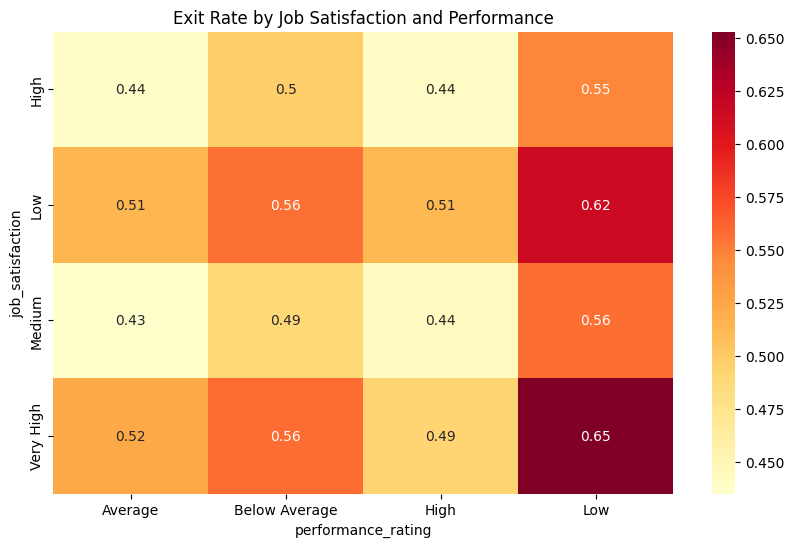

In [16]:
# 9. Job Satisfaction vs Performance
def analyze_job_satisfaction_performance(data):
    plt.figure(figsize=(10, 6))
    sns.heatmap(pd.crosstab(data['job_satisfaction'], data['performance_rating'], 
                           values=data['exit_status'].map({'Left': 1, 'Stayed': 0}), 
                           aggfunc='mean'),
                annot=True, cmap='YlOrRd')
    plt.title('Exit Rate by Job Satisfaction and Performance')
    plt.show()

analyze_job_satisfaction_performance(data)

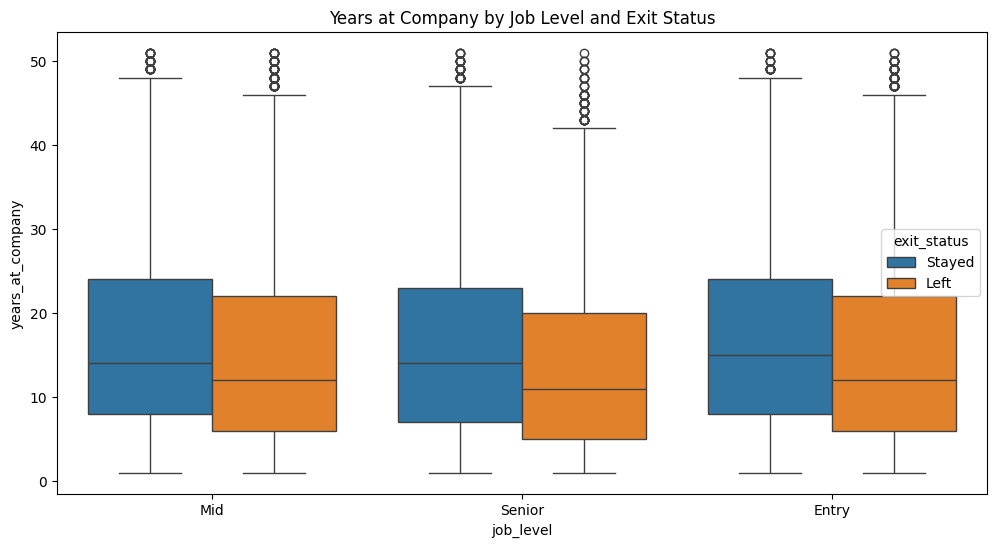

<Figure size 1000x600 with 0 Axes>

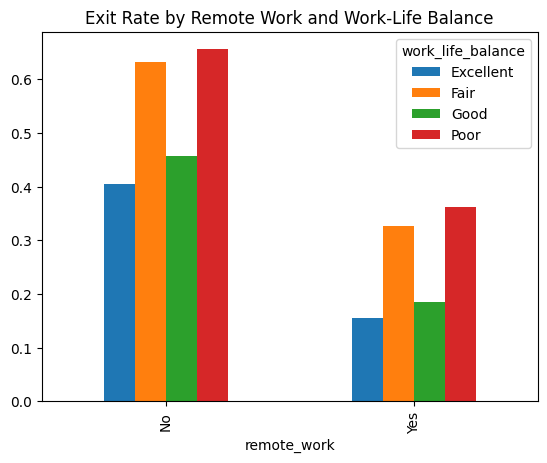

In [17]:
# 10. Tenure Analysis
def analyze_tenure(data):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='job_level', y='years_at_company', hue='exit_status')
    plt.title('Years at Company by Job Level and Exit Status')
    plt.show()


# 11. Remote Work Impact
def analyze_remote_work(data):
    plt.figure(figsize=(10, 6))
    remote_impact = pd.crosstab([data['remote_work'], data['work_life_balance']], 
                               data['exit_status'], normalize='index')
    remote_impact['Left'].unstack().plot(kind='bar')
    plt.title('Exit Rate by Remote Work and Work-Life Balance')
    plt.show()

    
analyze_tenure(data)
analyze_remote_work(data)

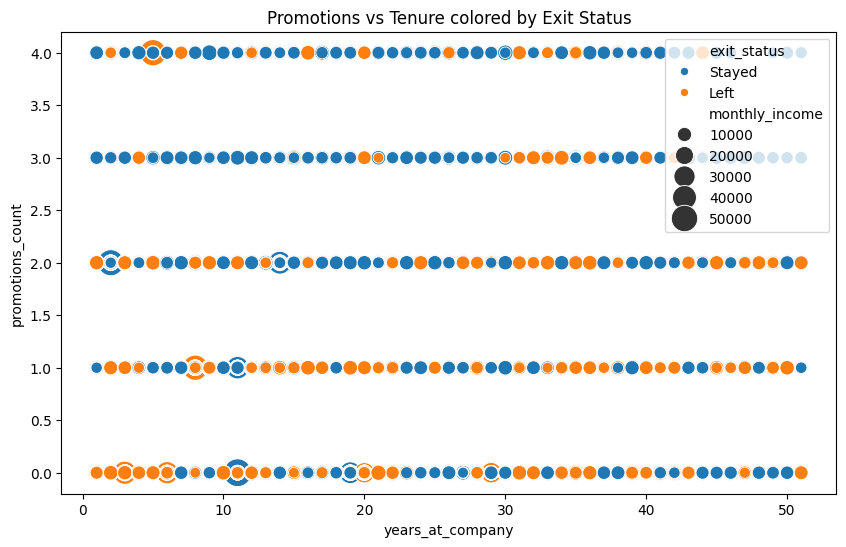

<Figure size 1200x600 with 0 Axes>

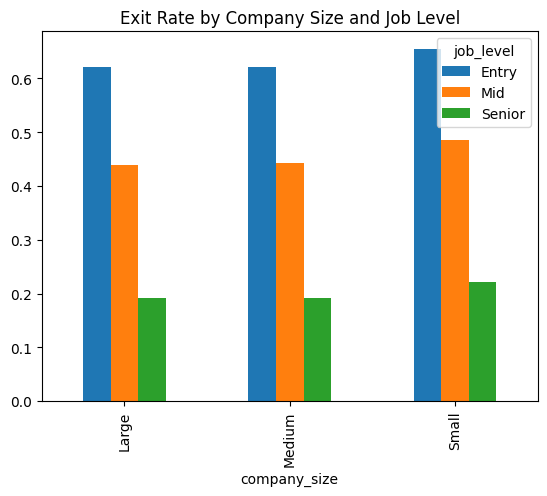

In [18]:
# 12. Promotion vs Tenure Analysis
def analyze_promotions(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='years_at_company', y='promotions_count', 
                    hue='exit_status', size='monthly_income', sizes=(50, 400))
    plt.title('Promotions vs Tenure colored by Exit Status')
    plt.show()

# 13. Company Size Impact
def analyze_company_size(data):
    plt.figure(figsize=(12, 6))
    size_impact = pd.crosstab([data['company_size'], data['job_level']], 
                             data['exit_status'], normalize='index')
    size_impact['Left'].unstack().plot(kind='bar')
    plt.title('Exit Rate by Company Size and Job Level')
    plt.show()

analyze_promotions(data)
analyze_company_size(data)

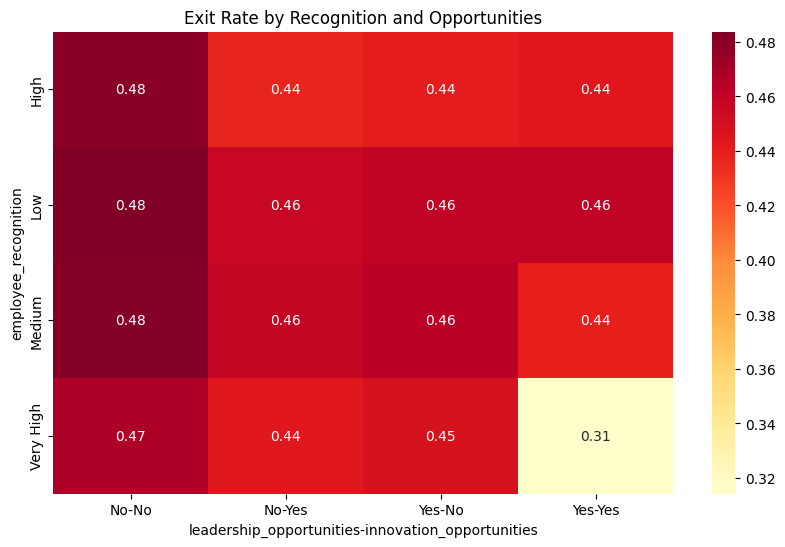

In [19]:
# 14. Recognition vs Opportunities
def analyze_recognition_opportunities(data):
    plt.figure(figsize=(10, 6))
    sns.heatmap(pd.crosstab(data['employee_recognition'], 
                           [data['leadership_opportunities'], data['innovation_opportunities']], 
                           values=data['exit_status'].map({'Left': 1, 'Stayed': 0}), 
                           aggfunc='mean'),
                annot=True, cmap='YlOrRd')
    plt.title('Exit Rate by Recognition and Opportunities')
    plt.show()

analyze_recognition_opportunities(data)

<Figure size 1500x1500 with 0 Axes>

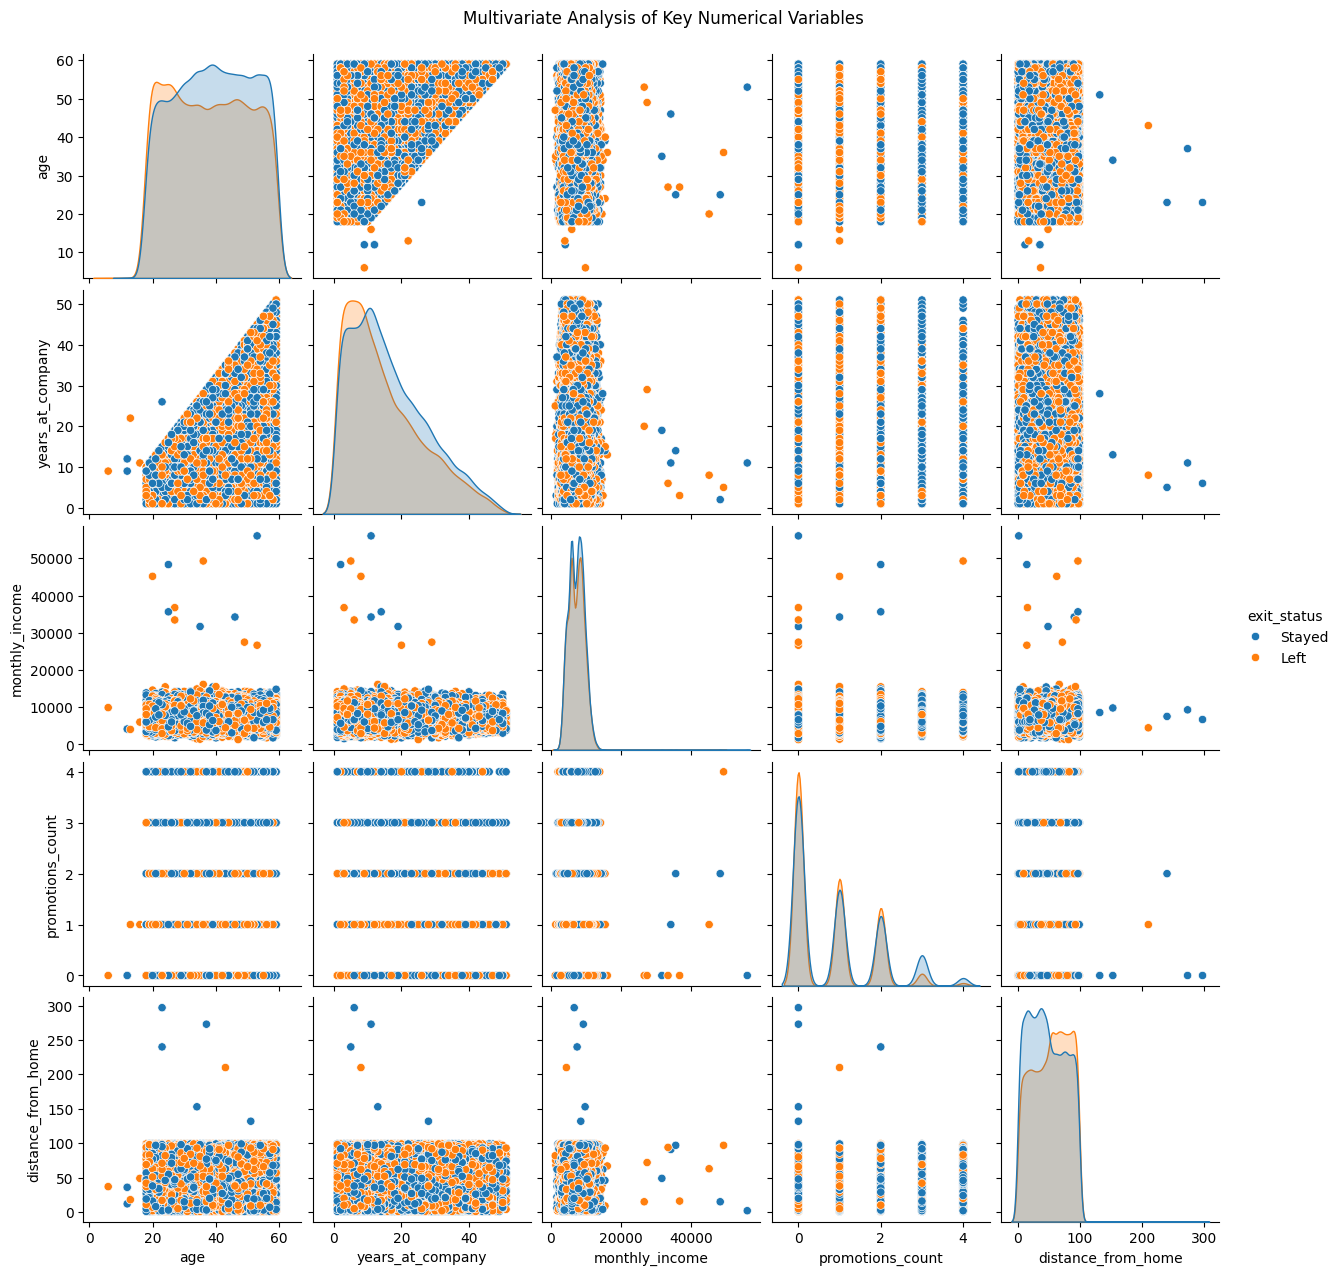

In [20]:
# 15. Multivariate Analysis
def perform_multivariate_analysis(data):
    # Select key numerical variables
    vars_of_interest = ['age', 'years_at_company', 'monthly_income', 
                       'promotions_count', 'distance_from_home']
    
    plt.figure(figsize=(15, 15))
    sns.pairplot(data=data[vars_of_interest + ['exit_status']], hue='exit_status')
    plt.suptitle('Multivariate Analysis of Key Numerical Variables', y=1.02)
    plt.show()

perform_multivariate_analysis(data)

# Pre - Processing

- Handles both numerical and categorical features
- Performs imputation for missing values
- Scales numerical features
- Encodes categorical variables

In [14]:
# Importing pre-processing TOOLs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


# Import different models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [8]:
def load_data():
    train = pd.read_csv('./submission/train.csv')
    test = pd.read_csv('./submission/test.csv')
    return train, test

train_df, test_df = load_data()

In [15]:
# Preprocessing function

def preprocess_data(train_df, test_df):

    # Separate features and target
    X_train = train_df.drop(['exit_status', 'response_id'], axis=1)
    y_train = train_df['exit_status']

    X_test = test_df.drop(['response_id'], axis=1)
    test_ids = test_df['response_id']
    
    # Identify numeric and categorical columns
    numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train.select_dtypes(include=['object']).columns
    
    # Create preprocessing pipelines
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
    ])
        
    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )
    
    # Fit and transform the training data
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)
    
    # Convert target to numeric
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    
    # Get feature names after preprocessing
    onehot_features = []
    for feature in categorical_features:
        unique_values = X_train[feature].unique()

        # Convert to strings and drop first category (due to drop='first' in OneHotEncoder)
        unique_values = [str(val) for val in unique_values if str(val) != 'nan']  # Convert to string and handle NaN
        onehot_features.extend([f"{feature}_{val}" for val in sorted(unique_values)[1:]])

    feature_names = list(numeric_features) + onehot_features
    
    return X_train_preprocessed, y_train, X_test_preprocessed, test_ids, feature_names, le



(X_train, y_train, X_test, test_ids, feature_names, label_encoder) = preprocess_data(train_df, test_df)

# Model Training and Evaluation

In [16]:
# Model training and evaluation

def train_and_evaluate_models(X_train, y_train):
    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(
            random_state=42, 
            n_estimators=200,
            max_depth=10
        ),

        'XGBoost': XGBClassifier(
            random_state=42,
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1
        ),

        'LightGBM': LGBMClassifier(
            random_state=42,
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1
        ),

        'Gradient Boosting': GradientBoostingClassifier(
            random_state=42,
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1
        ),

        'Logistic Regression': LogisticRegression(
            random_state=42,
            max_iter=1000
        )
    }
    
    # Train and evaluate each model
    results = {}

    for name, model in models.items():

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, 
                                  cv=5, scoring='roc_auc')
        
        # Train model on full training data
        model.fit(X_train, y_train)
        
        results[name] = {
            'model': model,
            'cv_score_mean': cv_scores.mean(),
            'cv_score_std': cv_scores.std()
        }
        
        print(f"\n{name} Results:")
        print(f"CV ROC-AUC Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    
    return results

model_results = train_and_evaluate_models(X_train, y_train)


Random Forest Results:
CV ROC-AUC Score: 0.8306 (+/- 0.0054)

XGBoost Results:
CV ROC-AUC Score: 0.8400 (+/- 0.0024)
[LightGBM] [Info] Number of positive: 25012, number of negative: 22676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 47688, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.524493 -> initscore=0.098049
[LightGBM] [Info] Start training from score 0.098049
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 25012, number of negative: 22677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is no

In [17]:
# Select best model based on CV score
best_model_name = max(
        model_results.items(), 
        key=lambda x: x[1]['cv_score_mean']
    )[0]

best_model = model_results[best_model_name]['model']

print(f"\nBest performing model: {best_model_name}")


Best performing model: LightGBM


In [23]:
best_model.feature_importances_

array([435, 442, 618, 256, 592, 261, 559, 119,  27,  24,  18,  30, 184,
        62, 159,  57,  77,  25,  98,  29,  79,  34,  79,  78,  34,  23,
        30, 129, 107, 174, 173, 244,  26,  70,  26, 203,  34,  46,  48,
        62, 110,  43,  48,  28])

In [20]:
len(feature_names)

41

In [18]:
# Feature importance analysis

def analyze_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        importances = abs(model.coef_[0])
    
    feature_imp = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    feature_imp = feature_imp.sort_values('Importance', 
                                        ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_imp.head(15))
    plt.title('Top 15 Most Important Features')
    plt.tight_layout()
    plt.show()
    
    return feature_imp

feature_importance = analyze_feature_importance(best_model, feature_names)

ValueError: All arrays must be of the same length

# Generate submisions

In [22]:
# Generate predictions and create submission file

def generate_predictions(best_model, X_test, test_ids, label_encoder):
    # Make predictions
    predictions_proba = best_model.predict_proba(X_test)
    predictions = best_model.predict(X_test)
    
    # Convert numeric predictions back to labels
    predictions_labels = label_encoder.inverse_transform(predictions)
    
    # Create submission DataFrame
    submission = pd.DataFrame({
        'response_id': test_ids,
        'exit_status': predictions_labels
    })
    
    return submission, predictions_proba

submission, predictions_proba = generate_predictions(
    best_model, X_test, test_ids, label_encoder
)

submission.to_csv('submission_1.csv', index=False)